   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

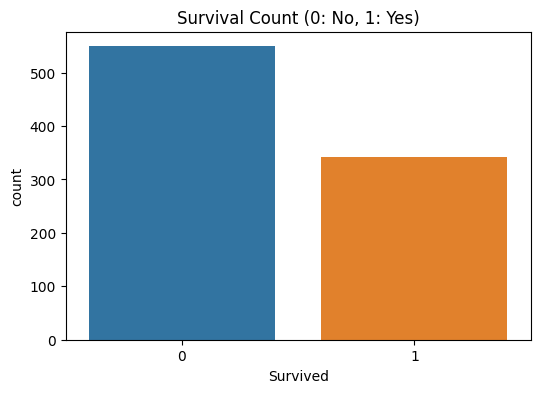

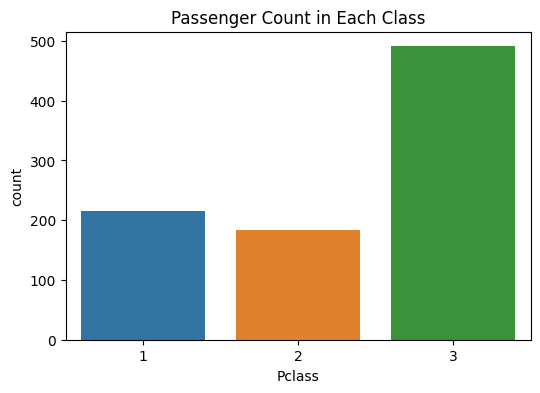

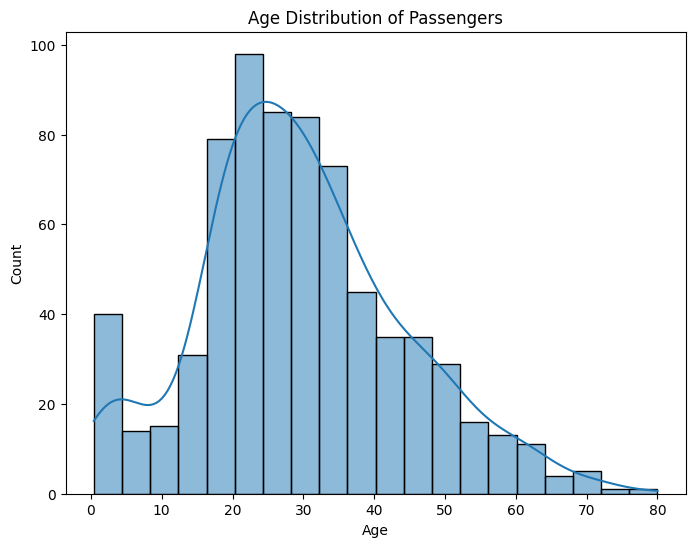

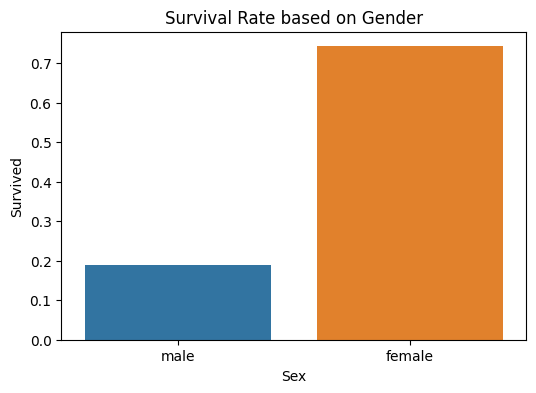

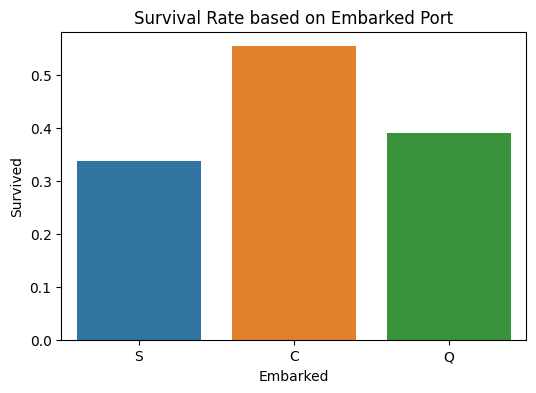

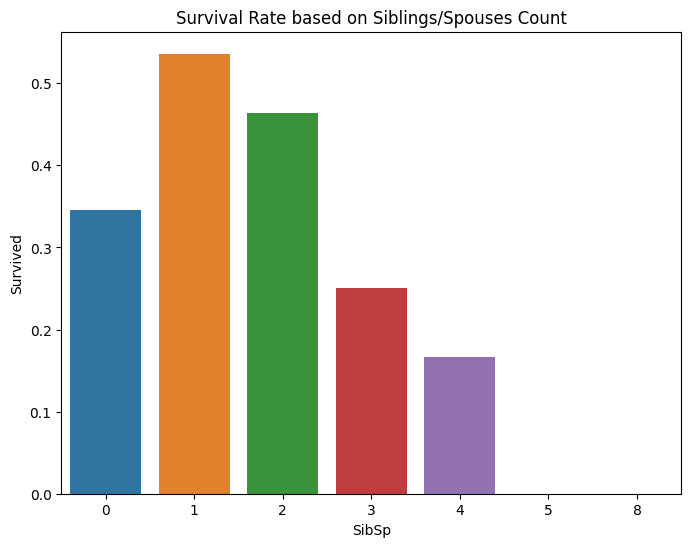

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# QUESTION 2
# Load the Titanic dataset
titanic_df = pd.read_csv('/users/shivam/desktop/train.csv')

# Display the first few rows of the dataset
print(titanic_df.head())

# Summary statistics of numerical columns
print(titanic_df.describe())

# Check for missing values
print(titanic_df.isnull().sum())

# Explore the distribution of the target variable "Survived"
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count (0: No, 1: Yes)')
plt.show()

# Explore the distribution of passengers across different classes (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Count in Each Class')
plt.show()

# Explore the age distribution of passengers
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

# Explore the survival rate based on gender (Sex)
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=titanic_df, errorbar=None)  # Updated parameter
plt.title('Survival Rate based on Gender')
plt.show()

# Explore the survival rate based on the port of embarkation (Embarked)
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=titanic_df, errorbar=None)  # Updated parameter
plt.title('Survival Rate based on Embarked Port')
plt.show()

# Explore the survival rate based on the number of siblings/spouses (SibSp)
plt.figure(figsize=(8, 6))
sns.barplot(x='SibSp', y='Survived', data=titanic_df, errorbar=None)  # Updated parameter
plt.title('Survival Rate based on Siblings/Spouses Count')
plt.show()





        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

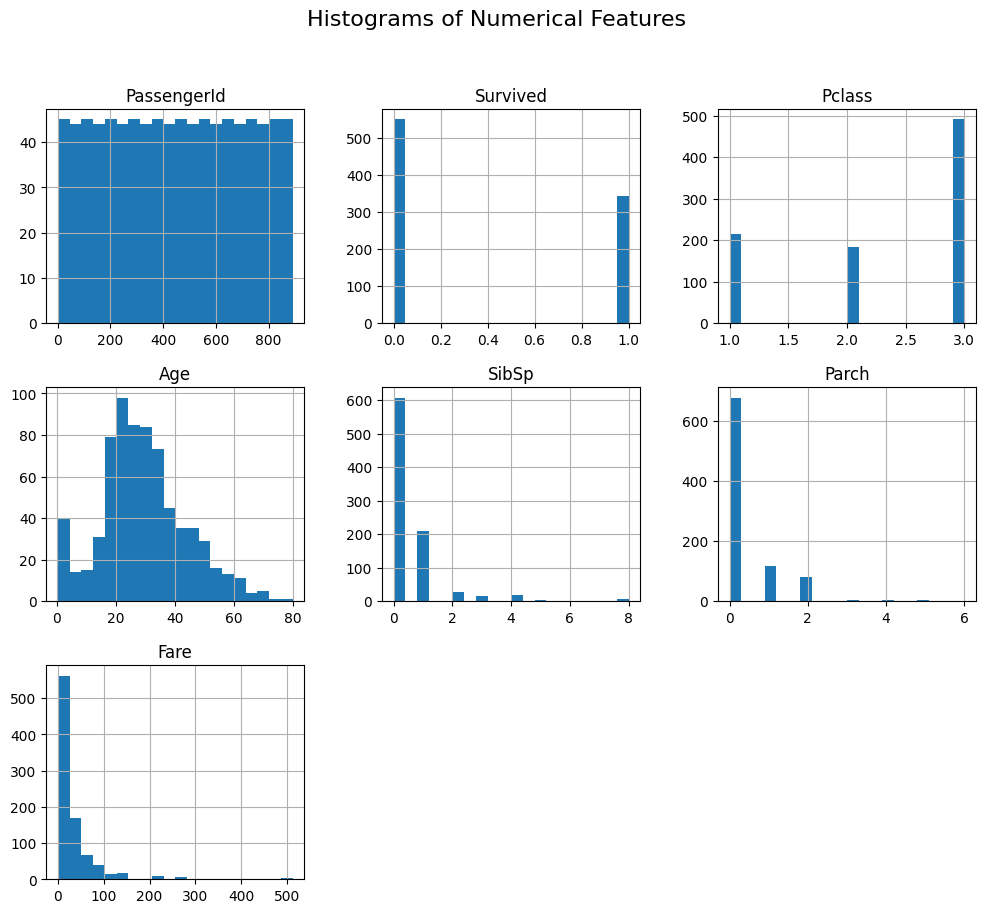

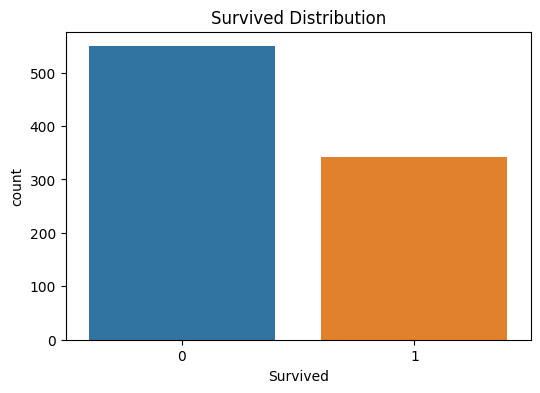

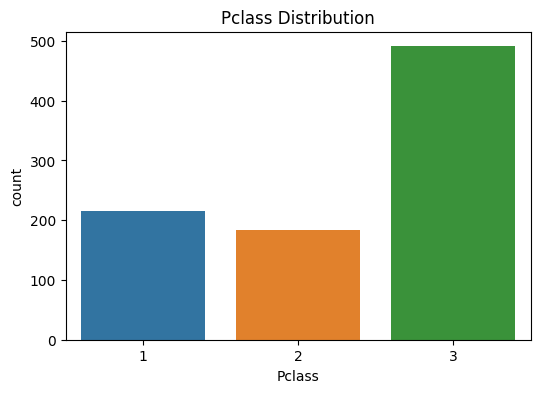

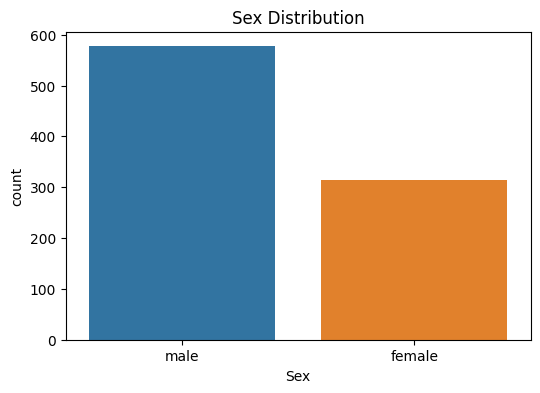

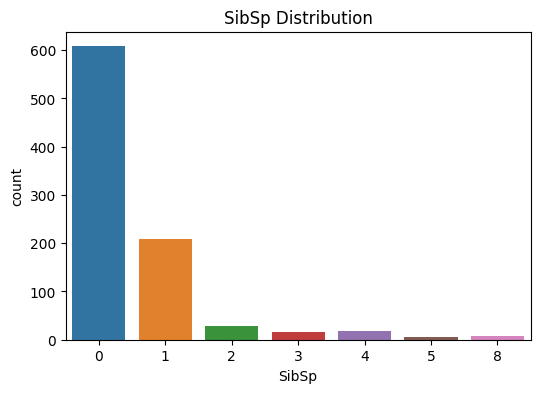

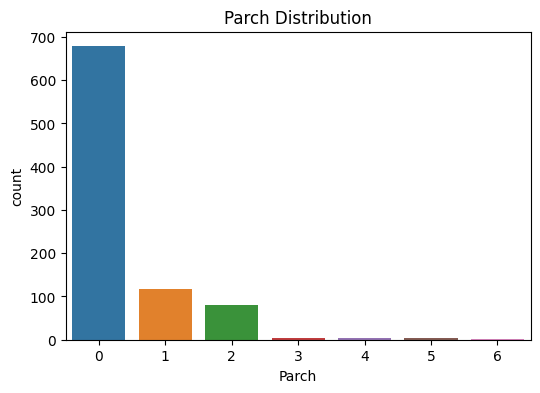

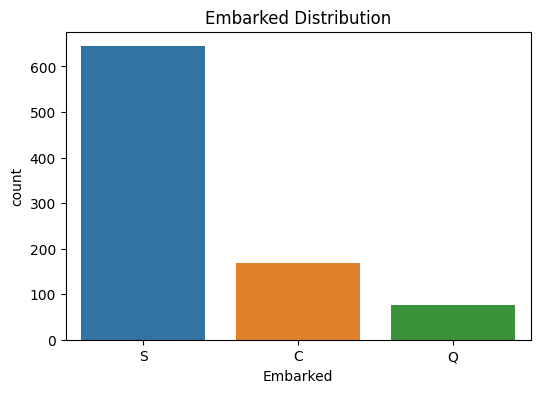

In [3]:
#2 QUESTION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.read_csv('/users/shivam/desktop/train.csv')

# Display summary statistics
summary_stats = titanic_df.describe(include='all')
print(summary_stats)

# Identify data types
data_types = titanic_df.dtypes
print(data_types)

# Visualize the data distribution
# Using histograms for numerical features
titanic_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Using count plots for categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=titanic_df)
    plt.title(f'{feature} Distribution')
    plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Titanic dataset
titanic_df = pd.read_csv('/users/shivam/desktop/train.csv')

# Handle Missing Values
# Fill missing 'Age' values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Handle Outliers
# In this example, we'll use the Z-score method to detect and remove outliers in 'Fare' column.
z_scores = (titanic_df['Fare'] - titanic_df['Fare'].mean()) / titanic_df['Fare'].std()
titanic_df = titanic_df[z_scores.abs() < 3]  # Keep only rows with Z-score within 3 standard deviations.

# Feature Engineering
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch' columns
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Drop irrelevant columns and 'Cabin' column with high missing values
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables into numerical using Label Encoding
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Feature Scaling
scaler = StandardScaler()
titanic_df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(titanic_df[['Age', 'Fare', 'FamilySize']])

# Display the preprocessed data
print(titanic_df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  \
0         0       3    1 -0.562191      1      0 -0.657256         2   
1         1       1    0  0.665400      1      0  1.525623         0   
2         1       3    0 -0.255293      0      0 -0.634246         2   
3         1       1    0  0.435227      1      0  0.905759         2   
4         0       3    1  0.435227      0      0 -0.629984         2   

   FamilySize  
0    0.072580  
1    0.072580  
2   -0.553329  
3    0.072580  
4   -0.553329  


In [13]:
#Question4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Titanic dataset
titanic_df = pd.read_csv('/users/shivam/desktop/train.csv')

# Preprocess the data (similar to the previous preprocessing steps)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

scaler = StandardScaler()
titanic_df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(titanic_df[['Age', 'Fare', 'FamilySize']])

# Split the data into features (X) and target variable (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Implement the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate and compare the performance of each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate SVM model
evaluate_model(y_test, y_pred_svm, "SVM")

# Evaluate Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")


SVM Evaluation:
Accuracy: 0.78
Precision: 0.75
Recall: 0.70
F1 Score: 0.73
Confusion Matrix:
[[88 17]
 [22 52]]


Random Forest Evaluation:
Accuracy: 0.82
Precision: 0.78
Recall: 0.77
F1 Score: 0.78
Confusion Matrix:
[[89 16]
 [17 57]]




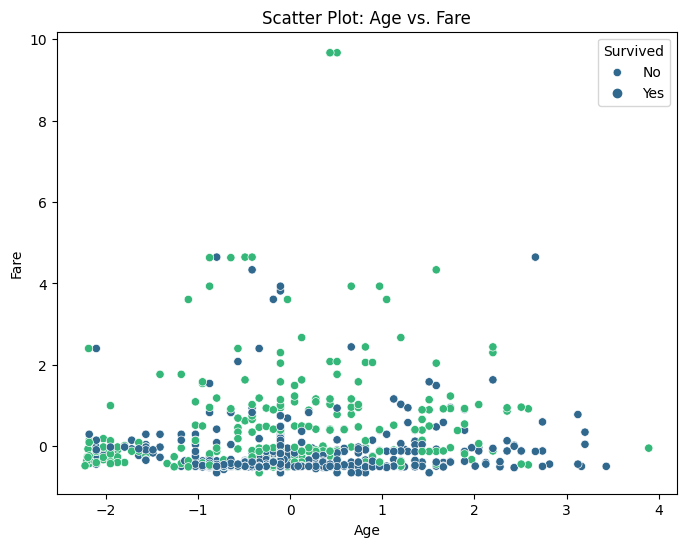

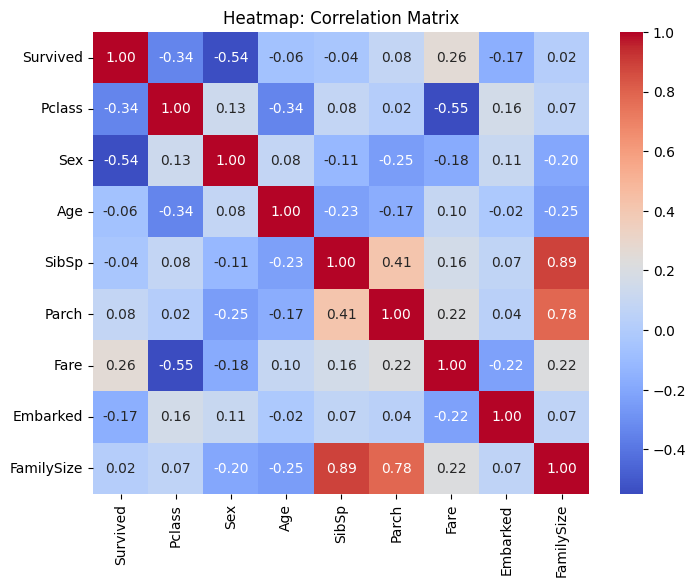

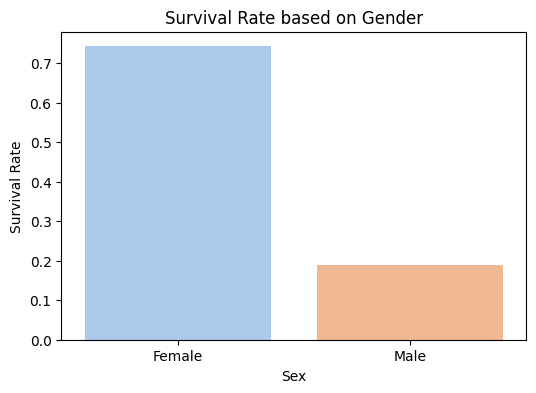

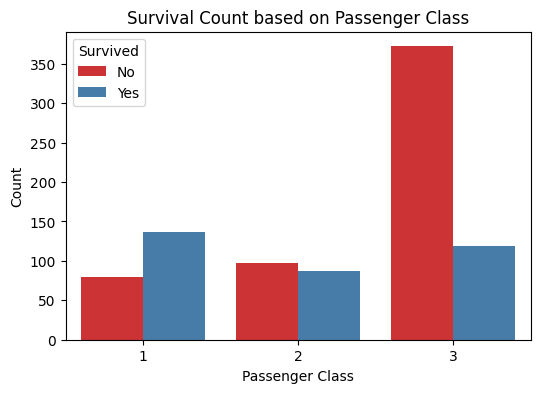

In [15]:
#Question5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.read_csv('/users/shivam/desktop/train.csv')

# Preprocess the data (similar to previous preprocessing steps)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

scaler = StandardScaler()
titanic_df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(titanic_df[['Age', 'Fare', 'FamilySize']])

# Scatter Plot: Age vs. Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Survived', palette='viridis')
plt.title('Scatter Plot: Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap: Correlation Matrix')
plt.show()

# Bar Chart: Survival Rate based on Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=titanic_df, errorbar=None, palette='pastel')
plt.title('Survival Rate based on Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Count Plot: Survival Count based on Passenger Class (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette='Set1')
plt.title('Survival Count based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
